In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

from copy import copy
from pathlib import Path

from My_libraries.my_stats import half_frame


# Discrete random variables


## Discrete distributions


### Uniform distribution 

Occurs for equi-probable random events: throwing a die, flipping a coin, drawing a rafle.

The probability of an event is the inverse of the number of possible events. The probability mass function is:

> $Pr(X=k) = \frac{1}{n}$

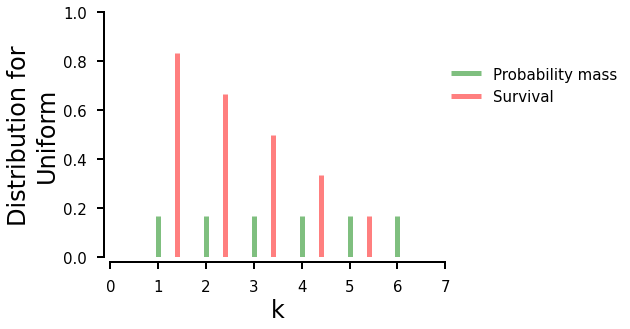

In [21]:
n = 6
x = np.arange(1, n + 1)
rv = stats.randint(1, n + 1)

fig = plt.figure( figsize = (6, 4.5) )
ax = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(ax, "k", "Distribution for\nUniform", font_size = my_font_size)

# Calculate and plot histogram
ax.vlines(x, 0, rv.pmf(x), color = "g", linewidth = 5, alpha = 0.5, label = "Probability mass")
# ax.vlines(x+0.2, 0, rv.cdf(x), color = "b", linewidth = 5, alpha = 0.5, label = "Cumulative")
ax.vlines(x+0.4, 0, rv.sf(x), color = "r", linewidth = 5, alpha = 0.5, label = "Survival")

# Format legend
ax.legend(loc = (1.0, 0.6), frameon = False, markerscale = 1.8, fontsize = my_font_size)

ax.set_xlim(0., n+1)
ax.set_ylim(0, 1)

plt.show()

### Binomial distribution 

Is the result of the repetition of independent trials. Flipping a coin several times.  Throwing one or more dice.

A fair coin has 50% chance of landing on heads and a 50% chance of landing on tails. The binomial distribution with p = 0.5 and n = 20 specifies the probability of tossing k heads. 

The probability mass function is:

> $Pr(X=k) = C^n_k ~ p^{k} ~ (1-p)^{n-k}$


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


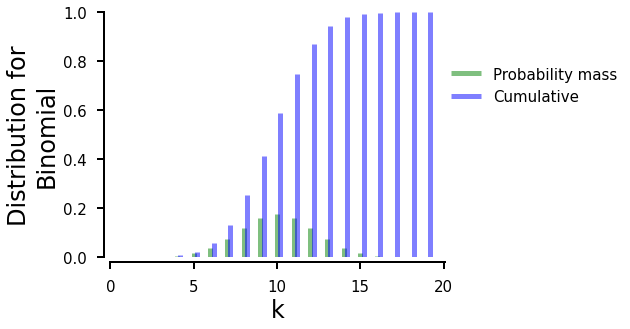

In [22]:
p = .5
n = 20
x = np.arange(0, n+1, 1)
print(x)
rv = stats.binom(n, p)

fig = plt.figure( figsize = (6, 4.5) )
ax = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(ax, "k", "Distribution for\nBinomial", font_size = my_font_size)

# Calculate and plot histogram
ax.vlines(x, 0, rv.pmf(x), color = "g", linewidth = 5, alpha = 0.5, label = "Probability mass")
ax.vlines(x+0.2, 0, rv.cdf(x), color = "b", linewidth = 5, alpha = 0.5, label = "Cumulative")
# ax.vlines(x+0.4, 0, rv.sf(x), color = "r", linewidth = 5, alpha = 0.5, label = "Survival")

# Format legend
ax.legend(loc = (1.0, 0.6), frameon = False, markerscale = 1.8, fontsize = my_font_size)
ax.set_ylim(0, 1)
ax.set_xlim(0, n + .1)

plt.show()

### Poisson distribution 

Is the result of counting events that have an exponential distribution of inter-event times. Examples are the decay of radiactive nuclei or the failure of light bulbs.

The probability mass function is:

> $Pr(X=k) =  \frac{\lambda^k e^{-\lambda}}{k!}$

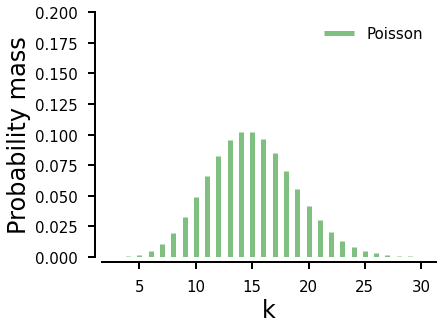

In [32]:
mu = 15
x = np.arange(stats.poisson.ppf(0.0001, mu), stats.poisson.ppf(0.9999, mu))
rv = stats.poisson(mu)

fig = plt.figure( figsize = (6, 4.5) )
ax = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(ax, "k", "Probability mass", font_size = my_font_size)

# Calculate and plot histogram
ax.vlines(x, 0, rv.pmf(x), color = "g", linewidth = 5, alpha = 0.5, label = "Poisson")

# Format legend
ax.legend(loc = "best", frameon = False, markerscale = 1.8, fontsize = my_font_size)
ax.set_ylim(0, .2)

plt.show()


Let us put these two plots together for better comparison:

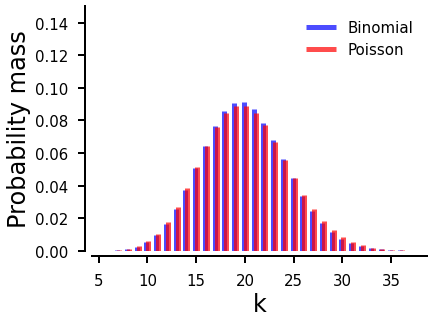

In [40]:
p = 0.05
n = 400
x = np.arange(stats.binom.ppf(0.0001, n, p), stats.binom.ppf(0.9999, n, p))
rv1 = stats.binom(n, p)

mu = n * p
rv2 = stats.poisson(mu)


fig = plt.figure( figsize = (6, 4.5) )
ax =  fig.add_subplot(1,1,1) 
my_font_size = 15
half_frame(ax, "k", "Probability mass", font_size = my_font_size)

# Calculate and plot histogram
ax.vlines(x-0.1, 0, rv1.pmf(x), color = "b", linewidth = 5, alpha = 0.7, label = "Binomial")
ax.vlines(x+0.1, 0, rv2.pmf(x), color = "r", linewidth = 5, alpha = 0.7, label = "Poisson")

# Format legend
ax.legend(loc = "best", frameon = False, markerscale = 1.8, fontsize = my_font_size)
ax.set_ylim(0, 0.15)

plt.show()

### Geometric distribution 

Is the result of counting the number of events until a specific one occurs. For example, how many coins must you flip until you get tails.  The probability mass function is:

> $Pr(X=k) = (1-p)^{k-1}p$

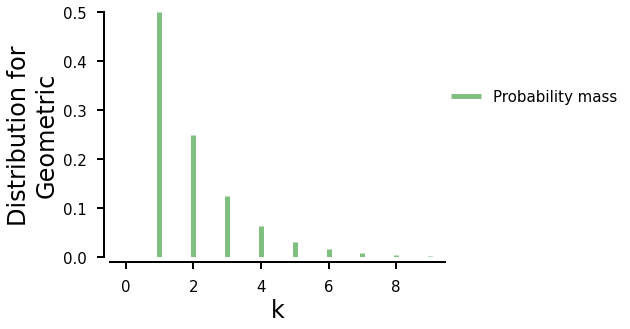

In [41]:
p = 0.5
x = np.arange(stats.geom.ppf(0, p), stats.geom.ppf(0.999, p))
rv1 = stats.geom(p)


fig = plt.figure( figsize = (6, 4.5) )
ax = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(ax, "k", "Distribution for\nGeometric", font_size = my_font_size)

# Calculate and plot histogram
ax.vlines(x, 0, rv1.pmf(x), color = "g", linewidth = 5, alpha = 0.5, label = "Probability mass")
# ax.vlines(x+0.2, 0, rv1.cdf(x), color = "b", linewidth = 5, alpha = 0.5, label = "Cumulative")
# ax.vlines(x+0.4, 0, rv1.sf(x), color = "r", linewidth = 5, alpha = 0.5, label = "Survival")

# Format legend
ax.legend(loc = (1.0, 0.6), frameon = False, markerscale = 1.8, fontsize = my_font_size)
ax.set_ylim(0, 0.5)

plt.show()

### Negative binomial distribution 

Is the result of counting the number of events until a specific number of desired ones occur. For example, how many coins must you flip until you get three tails.  The probability mass function is:

> $Pr(X=(k, n)) = C^{k+n-1}_{n-1} ~ p^n ~ (1-p)^k$

The type of the variable rv1 is <class 'scipy.stats._distn_infrastructure.rv_frozen'>

The type of the variable rv1.pmf is <class 'numpy.ndarray'>



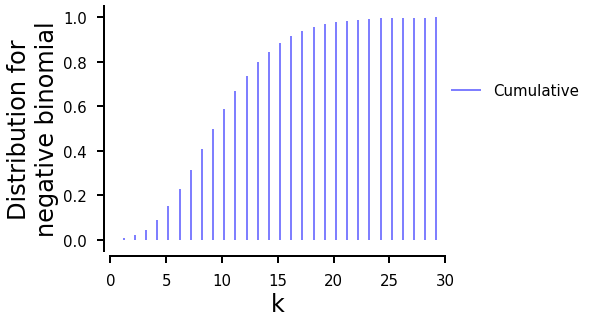

In [68]:
p = .5
n = 10
x = np.arange(stats.nbinom.ppf(0.0001, n, p), stats.nbinom.ppf(0.9999, n, p))
# x = range(0, 3000)
rv1 = stats.nbinom(n, p)

print(f"The type of the variable rv1 is {type(rv1)}\n")


fig = plt.figure( figsize = (6, 4.5) )
ax = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(ax, "k", "Distribution for\nnegative binomial", font_size = my_font_size)

# Calculate and plot histogram
# ax.vlines(x, 0, rv1.pmf(x), color = "g", linewidth = 2, alpha = 0.5, label = "Probability mass")
print(f"The type of the variable rv1.pmf is {type(rv1.pmf(x))}\n")

ax.vlines(x+0.2, 0, rv1.cdf(x), color = "b", linewidth = 2, alpha = 0.5, label = "Cumulative")
# ax.vlines(x+0.4, 0, rv1.sf(x), color = "r", linewidth = 2, alpha = 0.5, label = "Survival")

# Format legend
ax.legend(loc = (1.0, 0.6), frameon = False, markerscale = 1.8, fontsize = my_font_size)
ax.set_xlim(0, 30)

plt.show()

## Calculating (some of the) moments of these distributions


The $n^{th}$ moment of a discrete variable drawn from a distribution $p(k)$ is given by

$m_n = \sum_{k \in S} k^n~p(k)$

where $S$ is the sample space of the random variable.


### Zero-th order and first moments

For n = 0, we have simply:

$m_0 = \sum_{k \in S} k^n~p(k) = 1$

The first moment is also called the **mean** and the **expected value**:

$m_1 = \sum_{k \in S} k~p(k) = \mu$

It is relatively straighforward to calculate for several of the distributions discussed above.

**Uniform:**

$m_1 = \sum_{k = ki}^{k_f} \frac{k}{k_f - k_i + 1} = (k_f - k_i + 1)~\frac{k_f + k_i}{2~(k_f - k_i + 1)} = \frac{k_f + k_i}{2}$

**Poisson:**

$m_1 = \sum_{k =  0}^{\infty} k~\frac{\lambda^k e^{-\lambda}}{k!}$ 

$= e^{-\lambda} ~\sum_{k =  1}^{\infty} \lambda ~\frac{\lambda^{k-1}}{(k-1)!}$

$= \lambda~ e^{-\lambda} ~\sum_{j =  0}^{\infty} \frac{\lambda^{j}}{j!}$ 

$= \lambda ~e^{-\lambda}~ e^{ \lambda}$

$= \lambda$

**Binomial:**

$m_1 = \sum_{k =  0}^{n} k~C_k^n ~p^k~(1-p)^{n-k}$

$ = \sum_{k =  1}^{n} \frac{k ~ n!}{k!~ (n-k)!} ~ p^k ~ (1-p)^{n-k}$

$ = \sum_{j =  0}^{n-1} \frac{n!}{j!~(n-1 -j)!} ~p^{j+1}~ (1-p)^{n-1 -j}$

$ = \sum_{j =  0}^{m} \frac{n ~m!}{j!~(m-j)!} ~p ~p^j ~(1-p)^{m-j}$

$= np ~\sum_{j =  0}^{m} \frac{m!}{j!~(m-j)!}~p^j ~(1-p)^{m-j}$

$ = np$



### Second moments

The second moment is defined as:

$m_2 = \sum_{k \in S} k^2~p(k)$

More useful in practical terms then the sec ond moment is actually the **centered second moment**, which is also called **Variance**:

$V = \sum_{k \in S} (k - \mu)^2~p(k) = m_2 - \mu^2$

The Variance is also relatively straighforward to calculate for several of the distributions discussed above.

**Uniform:**

$V = \frac{(k_f - k_i + 1)^2 - 1}{12}$ 


**Binomial:**

$V = np(1-p)$ 

**Poisson:**

$V = \lambda$





## Generating random variables according to specified distribution

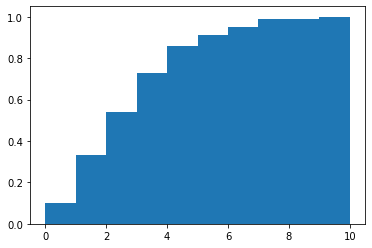

In [67]:
n = 10
p = 0.8
L = 100

# This generates np.array of random variables 

random_distribution = stats.nbinom.rvs(n, p, size = L)
# print(random_distribution)
# print(len(random_distribution))

# Create histogram
plt.hist(random_distribution, bins = 10, density = True, cumulative= True)

# Plot it
plt.savefig(Path.cwd() / f'figure_dist_nbinom_n{n}_p{p}_size{L}.png')



### Dependence of sample mean on sample size

I want you to study how the mean of a binomial sample changes with sample size `L`. You can use and modify the code two cells above to create a function that returns the sample mean of `L` binomial random variables and then plot the sample mean versus `L`.

10
50
250
1250


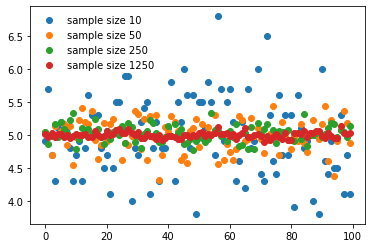

In [90]:
# Choose distribution
# Choose parameters
# Generate sample with specific size
# Calculate mean of sample
# Repeat many time, and plot all the means

n = 20
p = 0.25
N_repeats = 100

for L in [10, 50, 250, 1250]:
    sample_means = [] 
    print(L)
    
    for i in range(N_repeats):
        
        sample = stats.binom.rvs(n, p, size = L)
        sample_means.append( np.mean(sample) )

    plt.plot(sample_means, 'o', label = f"sample size {L}")  

# plt.ylim(1,8)
plt.legend(loc = 'best', frameon = False)
# Plot data
plt.show()

### Dependence of sample standard deviation on sample size

Repeat the analysis above but for the standard deviation of a binomial sample.
